<a href="https://colab.research.google.com/github/VictorMercier/Track-Data-Science/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression Introduction

Linear regression looks at the relationship between the data you have and the data you want to predict.

Linear Regression is a basic and commonly used type of predictive analysis. It’s the most widely used of all statistical techniques. It quantifies the relationship between one or more predictor variables and one outcome variable.

Linear regression models are used to show (or predict) the relationship between two variables or factors. Regression analysis is commonly used to show the correlation between two variables.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [4]:
# J'ai importé un excel que j'ai vu dans une vidéo youtube où un mec explique comment on fait une regréssion linéaire. 
# Le excel est dans l'onglet fichier si vous voulez le voir. 
data = pd.read_excel(r"oil_exxon.xlsx")   
data 

,date,exon_price,oil_price
0,2014-03-28,97.699997,106.64
1,2014-03-31,97.680000,105.95
2,2014-04-01,97.730003,105.70
3,2014-04-02,97.949997,103.37
4,2014-04-03,97.930000,104.88
...,...,...,...
1251,2019-03-19,80.870003,67.13
1252,2019-03-20,81.320000,68.35
1253,2019-03-21,81.790001,68.30
1254,2019-03-22,80.480003,66.29


In [6]:
# Ici je change la colonne Index tout à gauche par les dates pour une meilleure lisibitité du tableau
data.index = pd.to_datetime(data["date"])

# Avec la fonction .drop() je retire la colonne date du tableau vu qu'elle est en index. 
data = data.drop('date', axis=1)
data

,exon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88
...,...,...
2019-03-19,80.870003,67.13
2019-03-20,81.320000,68.35
2019-03-21,81.790001,68.30


In [7]:
data

,exon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88
...,...,...
2019-03-19,80.870003,67.13
2019-03-20,81.320000,68.35
2019-03-21,81.790001,68.30


In [8]:
data = data.rename(columns={"exon_price" : "exxon_price"})
data 

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88
...,...,...
2019-03-19,80.870003,67.13
2019-03-20,81.320000,68.35
2019-03-21,81.790001,68.30


In [12]:
# Je vérifie s'il y a des cases vides (i.e avec des NA ou NaN), on peut retirer le display
display(data.isna().any())

# Etant donné que j'ai True, je vais les enlever avec la fonction .dropna()
data = data.dropna()
data

exxon_price    False
oil_price      False
dtype: bool

exxon_price    False
oil_price      False
dtype: bool

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88
...,...,...
2019-03-19,80.870003,67.13
2019-03-20,81.320000,68.35
2019-03-21,81.790001,68.30


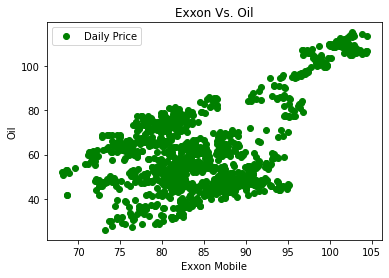

In [15]:
# Je définis mes axes x et y 
x = data["exxon_price"]
y = data["oil_price"]

# 1er graph simple sous forme de rond, d'où le "o" qui indique le format, "cercles". 
plt.plot(x, y, "o", color = "green", label = "Daily Price")
plt.title("Exxon Vs. Oil")
plt.xlabel("Exxon Mobile")
plt.ylabel("Oil")
plt.legend()
plt.show()

In [17]:
#mesurer la corrélation
data.corr()

,exxon_price,oil_price
exxon_price,1.00000,0.60132
oil_price,0.60132,1.00000


Strong relationship as r > 0.6


In [18]:
#juste avoir la description des données

data.describe()

,exxon_price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


75% des valeurs sont comprises entre mean - std < mean < mean + std, donc faible dispersion des valeurs

#Cheking for Outliers and Skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f320ca3e198>,
      dtype=object)

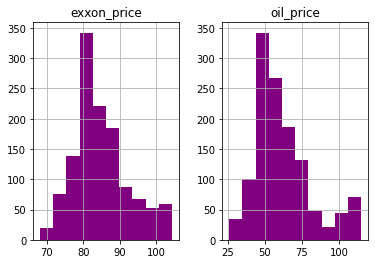

In [19]:
data.hist(grid=True, color = "purple")

Looks like normal distribution so it seems that is not a lot of outliers. However it looks a little bit left-skewed

#Calculate kurtosis and skewness

In [24]:
from scipy import stats
from scipy.stats import kurtosis, skew

In [29]:
#je calcule l'excès kurtosis en utilisant la méthode fisher. L'alternative c'est Pearson mais anyway. Kurtosis doit être proche de 0, sous Person proche de 3.
exxon_kurtosis = kurtosis(data["exxon_price"], fisher = True)
oil_kurtosis = kurtosis(data["exxon_price"], fisher = True)

#je calcule le skewness
exxon_skew = skew(data["exxon_price"])
oil_skew = skew(data["oil_price"])

display('Exxon Kurtosis: {:2}'.format(exxon_kurtosis))
display('Oil Kurtosis: {:2}'.format(oil_kurtosis))

display('Exxon Skew: {:2}'.format(exxon_skew))
display('Oil Skew: {:2}'.format(oil_skew))

'Exxon Kurtosis: 0.08838507514930338'

'Oil Kurtosis: 0.08838507514930338'

'Exxon Skew: 0.66024881165324'

'Oil Skew: 1.024326574686099'

In [ ]:
#m is the slope = la pente 
#b is the intercept = point d'intersection avec l'axe
m, b = np.polyfit(x,y,1)
# Cette fonction permet de calculer m et b afin de faire la droite sur le graph

print (m)
print (b)

1.5621549633978147
-70.54010935609301


About the np.polyfit: 
It is a pretty general least squares polynomial fit function which accepts the data set and a polynomial function of any degree (specified by the user), and returns a vector of coefficients p that minimises the squared error.

In [ ]:

plt.plot(x, y, "bo", color = "green")
plt.title("Exxon Vs. Oil")
plt.xlabel("Exxon Mobile")
plt.ylabel("Oil")

# Avec les données au dessus je peux calculer ma fonction (y = ax+b) et trouver la droite 
plt.plot(x , m*x+b)

NameError: ignored

The np.polyfit() function is an easy way to perfom a polynomial function as mentioned before. 
However, what we want to be able to do with our linear regression model is to be able to predict future values. In fact, we want to see here if exxon's stock price is correlated to the oil stock price. 
In other word, if the oil stock price increases, does the exxon stock price increases too ? 

In [ ]:
#Trouver la corrélation entre les 2 variables 
data.corr()

,exxon_price,oil_price
exxon_price,1.00000,0.60132
oil_price,0.60132,1.00000




*   Very strong relationship (|r|>0.8 =>)
*   Strong relationship (0.6≤|r|)
*   Moderate relationship (0.4≤|r|)
*   Weak relationship (0.2≤|r|)
*  Very weak relationship (|r|)

















In [ ]:
# As we  want to see if the stock price of exxon is correlated to the oil stock price 
# We will then have X (input) equal to oil price and Y (the output) equal to the exxon stock price
X = data[["oil_price"]]
y = data.drop("oil_price", axis=1)

print(X)
print(y)

            oil_price
date                 
2014-03-28     106.64
2014-03-31     105.95
2014-04-01     105.70
2014-04-02     103.37
2014-04-03     104.88
...               ...
2019-03-19      67.13
2019-03-20      68.35
2019-03-21      68.30
2019-03-22      66.29
2019-03-25      67.37

[1248 rows x 1 columns]
            exxon_price
date                   
2014-03-28    97.699997
2014-03-31    97.680000
2014-04-01    97.730003
2014-04-02    97.949997
2014-04-03    97.930000
...                 ...
2019-03-19    80.870003
2019-03-20    81.320000
2019-03-21    81.790001
2019-03-22    80.480003
2019-03-25    79.919998

[1248 rows x 1 columns]


In [ ]:
# Split the data to train them and then test them
# The train size will represent 80% of our data and the test will
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# Now that we have our X and y, we have to create a model and fit it. 
model = LinearRegression()
model.fit(X_train, y_train)

# Now that we have our regression model, we can make some predictions: 
y_predict = model.predict(X_test)

# An example of the first 4 predictions:
y_predict[:4]

array([[82.23530265],
       [82.87451035],
       [81.48245802],
       [78.9256272 ]])

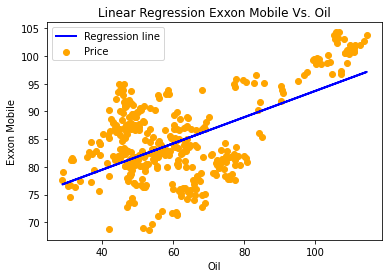

In [ ]:
# Let's built our model 
plt.scatter(X_test, y_test, color = "orange", label ="Price")
plt.plot(X_test, y_predict, color = "blue", linewidth = 2, label = "Regression line")

plt.title("Linear Regression Exxon Mobile Vs. Oil")
plt.xlabel("Oil")
plt.ylabel("Exxon Mobile")
plt.legend()
plt.show()


Now that we have seen the linear regression with one variable, let's try with multiple variables. 

# Multiple Regression 
